# SNOW Network Extraction

The SNOW algorithm, [published in Physical Review E](https://doi.org/10.1103/PhysRevE.96.023307), uses a marker-based watershed segmentation algorithm to partition an image into regions belonging to each pore.  The main contribution of the SNOW algorithm is to find a suitable set of initial markers in the image so that the watershed is not over-segmented.  SNOW is an acronym for Sub-Network of an Over-segmented Watershed.  This code works on both 2D and 3D images.  In this example a 2D image will be segmented using the predefined ``snow`` function in PoreSpy. 

Start by importing the necessary packages:

In [9]:
import porespy as ps
import scipy as sp
import matplotlib.pyplot as plt
import OpenPNM as op
import imageio

Generate an artificial 2D image for illustration purposes:

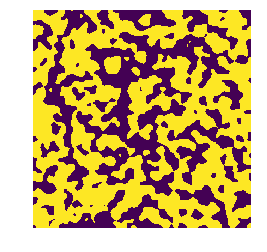

In [10]:
im = ps.generators.blobs(shape=[400, 400], porosity=0.6, blobiness=2)
plt.imshow(im)
plt.axis('off')
plt.show()

SNOW is composed of a series of filters, but PoreSpy has a single function that applies all the necessary steps:

In [11]:
snow_output = ps.network_extraction.snow(im)

____________________________________________________________
Beginning SNOW Algorithm
Peforming Distance Transform
Applying Gaussian blur with sigma = 0.4
Initial number of peaks:  225
Peaks after trimming saddle points:  199
Peaks after trimming nearby peaks:  195
____________________________________________________________
Partitioning Pore Space using Marker Based Watershed


The ``snow`` function returns a *tuple* containing all the images that are produced during the process. The most important result is the ``regions`` which is an image with each pore region marked by a unique voxel value.

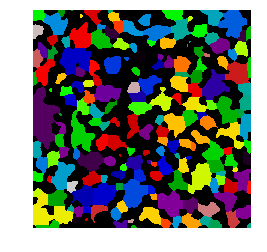

In [12]:
plt.imshow(snow_output.regions*snow_output.im, cmap=plt.cm.nipy_spectral)
plt.axis('off')
plt.show()

This ``regions`` image is then passed to the ``extract_pore_network`` function that analyzes each pore region to obtain all size and connective information. 

In [13]:
net = ps.network_extraction.extract_pore_network(im=snow_output.regions*snow_output.im)

____________________________________________________________
Extracting pore and throat information from image


100%|██████████████████████████████████████████████████████████████████████████████| 195/195 [00:00<00:00, 1838.49it/s]


It returns a python *dict* that is suitable for use in OpenPNM.

In [14]:
pn = op.Network.GenericNetwork()
pn.update(net)

OpenPNM has the ability to output network to a VTK file suitable for view in Paraivew:

In [15]:
op.export_data(network=pn, filename='extraction', fileformat='VTK')

Finally, to overlay the image and the network it is necessary to rotate the image. PoreSpy offers a tool for this:

In [16]:
im = ps.network_extraction.align_image_with_openpnm(im)
imageio.imsave('im.tif', sp.array(im, dtype=int))

And the result after opening both files in ParaView is:

![](https://i.imgur.com/Zivig0U.png)